In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
def gen(pop_size, prob1):
  rng = np.random.default_rng()
  firstGen = np.zeros((pop_size,2))
  for i in range(pop_size):
    if rng.binomial(1,prob1, 1)[0] == 0:
      firstGen[i, ] = [0,0]
    else:
      firstGen[i, ] = [1,1]
  return firstGen

In [3]:
def furtherGen(pop_size, num_gens, prob1):
  firstGen = gen(pop_size, prob1)
  allGens = []
  allGens.append(firstGen)
  first0 = 0
  first1 = 0
  #stats = np.array([50,50,0])  ## SULKOW- not necessary [50, 50, 0]  since you randomly chose the 0th generation AND
  # your pop size isn't necessarily 100.
  for i in range(pop_size):
    if (firstGen[i,] == [0,0]).all():   #SULKOW - I like your .all() solution.
        first0 += 1
    elif (firstGen[i,] == [1,1]).all():
        first1 += 1
  stats = np.array([first0/pop_size, first1/pop_size, 0])
  for genNum in range(num_gens):
    newGen = np.zeros((pop_size, 2))
    Hom0 = 0
    Hom1 = 0
    Het = 0
    for i in range(pop_size):
      parents = np.random.choice(np.arange(pop_size - 1), 2, replace = False)
      newGen[i ,0] = np.random.choice((allGens[genNum])[parents[0]], 1)
      newGen[i ,1] = np.random.choice((allGens[genNum])[parents[1]], 1)
      nNewGen = np.array([newGen[i,]])
      if (nNewGen == [0,0]).all():   #SULKOW - I like your .all() solution.
        Hom0 += 1
      elif (nNewGen == [1,1]).all():
        Hom1 += 1
      else:
        Het += 1
    Hom0 = Hom0/pop_size
    Hom1 = Hom1/pop_size
    Het = Het/pop_size
    stats = np.vstack((stats,[Hom0,Hom1,Het]))
    allGens.append(newGen)
  stats = np.column_stack((np.arange(0,stats.shape[0]),stats))

  return stats

In [4]:
stats = furtherGen(2000, 40, .3)  #SULKOW - pop_size should be >= 2000 to see the
df = pd.DataFrame(stats)
df.columns= ["Gen","Hom0", "Hom1","Het"]
df

<ipython-input-3-d245d85d331f>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  newGen[i ,0] = np.random.choice((allGens[genNum])[parents[0]], 1)
<ipython-input-3-d245d85d331f>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  newGen[i ,1] = np.random.choice((allGens[genNum])[parents[1]], 1)


,Gen,Hom0,Hom1,Het
0,0.0,0.6900,0.3100,0.0000
1,1.0,0.4815,0.1000,0.4185
2,2.0,0.4830,0.0965,0.4205
3,3.0,0.4900,0.1010,0.4090
4,4.0,0.4760,0.0975,0.4265
5,5.0,0.4845,0.0865,0.4290
6,6.0,0.4915,0.0880,0.4205
7,7.0,0.4780,0.0855,0.4365
8,8.0,0.4895,0.0930,0.4175
9,9.0,0.4915,0.0910,0.4175


<Axes: xlabel='Gen', ylabel='Hom0'>

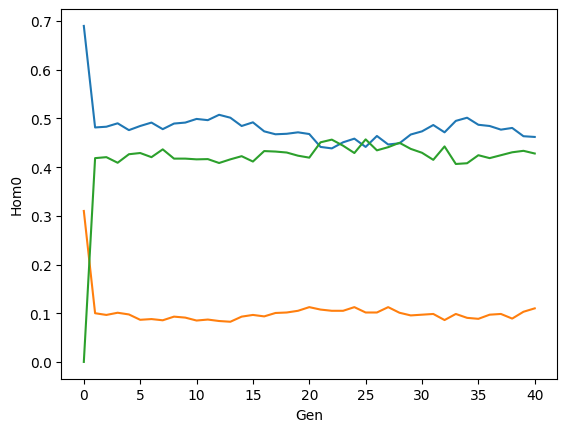

In [5]:
sns.lineplot(x = df["Gen"], y = df["Hom0"] )#.set(title=.....)
sns.lineplot(x = df["Gen"], y = df["Hom1"] )
sns.lineplot(x = df["Gen"], y = df["Het"] )